## Week 6

### cnn_demo intermediate layers or feature maps
Pass code    h?=+xb6n

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
import itertools

import pickle

In [3]:
import tensorflow_datasets as tfds
train_dataset, test_dataset = tfds.load('voc', split=['train', 'test'])
image_list = list(train_dataset.take(10).as_numpy_iterator())

with open("image_list.pkl", "wb") as fp:   #Pickling
    pickle.dump(image_list, fp)


2023-06-22 20:19:12.785353: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-22 20:19:13.522118: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14626 MB memory:  -> device: 0, name: Tesla V100-PCIE-16GB, pci bus id: 0001:00:00.0, compute capability: 7.0


In [4]:
with open("image_list.pkl", "rb") as fp:   # Unpickling
    image_list = pickle.load(fp)

In [5]:
image_list[0]

{'image': array([[[101, 102,  32],
         [131, 132,  64],
         [106, 108,  43],
         ...,
         [ 58,  70,  22],
         [ 61,  73,  25],
         [ 61,  73,  27]],
 
        [[117, 120,  49],
         [124, 127,  58],
         [131, 133,  68],
         ...,
         [ 63,  72,  25],
         [ 67,  76,  29],
         [ 70,  79,  32]],
 
        [[135, 142,  72],
         [145, 152,  82],
         [137, 144,  76],
         ...,
         [ 76,  84,  35],
         [ 78,  86,  35],
         [ 78,  86,  35]],
 
        ...,
 
        [[129, 116, 126],
         [123, 111, 113],
         [109,  99,  87],
         ...,
         [ 19, 151, 130],
         [ 20, 149, 127],
         [ 20, 149, 129]],
 
        [[183, 167, 180],
         [120, 105, 110],
         [ 99,  86,  77],
         ...,
         [ 22, 151, 129],
         [ 22, 150, 127],
         [ 22, 149, 128]],
 
        [[196, 178, 192],
         [116,  99, 105],
         [ 90,  75,  68],
         ...,
         [ 23, 151,

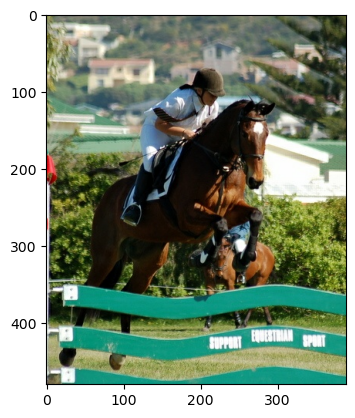

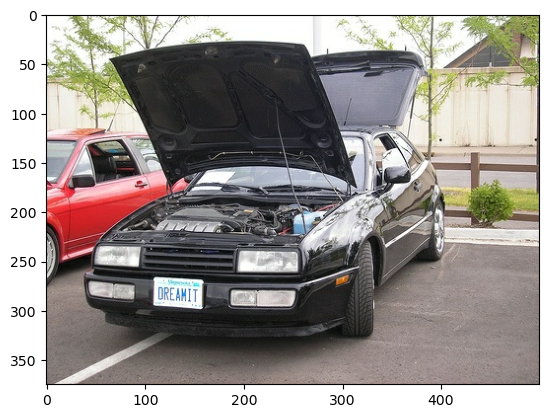

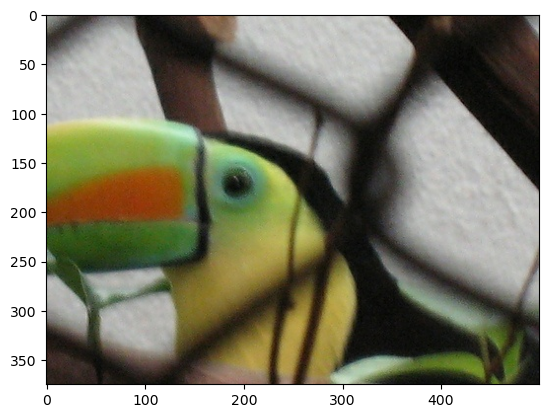

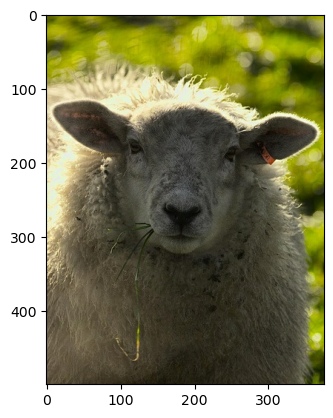

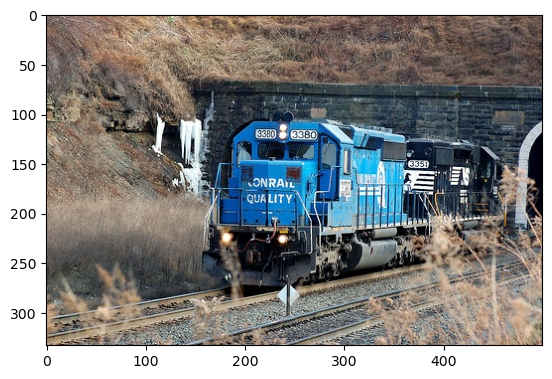

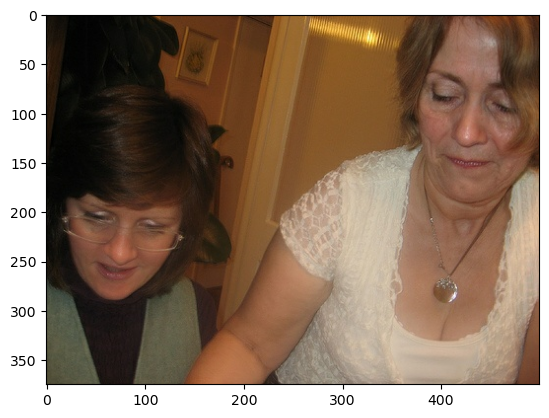

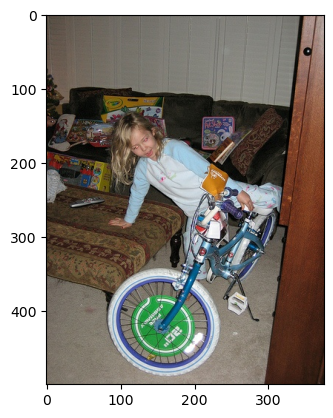

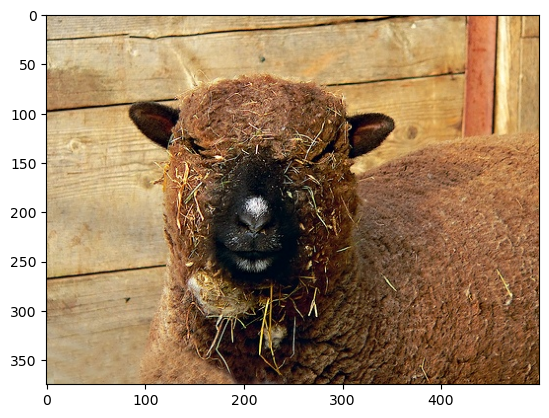

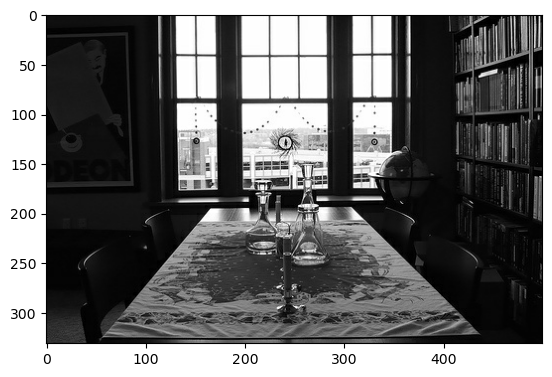

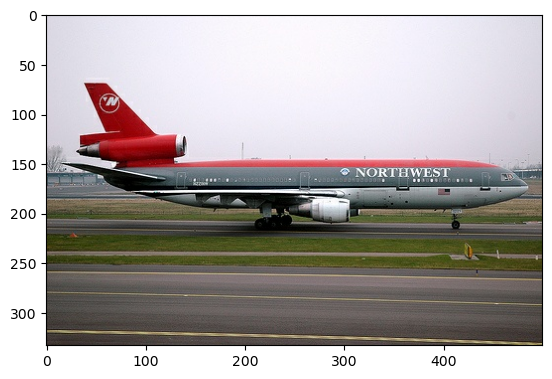

In [7]:
for i in range(10):
    plt.imshow(image_list[i]['image'])
    plt.show()
#these are object detection images 

In [6]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions

In [7]:
model = VGG16()

In [8]:
model.summary()
#information on the architecture and different layers
#Size of convolutions is 3x3
#None is the flexible dimension which means this model can take in as many images as you like 
# but they need to be in color and 224x224

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## Feature maps

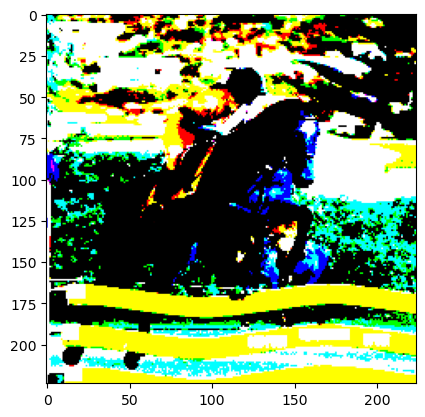

In [14]:
input_image = cv2.resize(image_list[0]['image'], (224,224)) #resize
input_image = preprocess_input(input_image)
plt.imshow(input_image)
plt.show()

In [16]:
#add extra dimension
input_image.shape

(224, 224, 3)

In [18]:
input_image[None].shape

(1, 224, 224, 3)

In [19]:
#other way to add extra dimension
input_image[np.newaxis].shape

(1, 224, 224, 3)

In [20]:
decode_predictions(model.predict(input_image[None]),top=5)

2023-06-22 18:57:41.393801: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100


[[('n04604644', 'worm_fence', 0.092365935),
  ('n02389026', 'sorrel', 0.07642304),
  ('n09835506', 'ballplayer', 0.050714638),
  ('n02403003', 'ox', 0.03852635),
  ('n02107142', 'Doberman', 0.031185372)]]

In [ ]:
#not the best image for a classifier so results are unusual and very low

Let's see one it does well on

In [9]:
input_image = cv2.resize(image_list[9]['image'], (224,224)) #resize
input_image = preprocess_input(input_image)


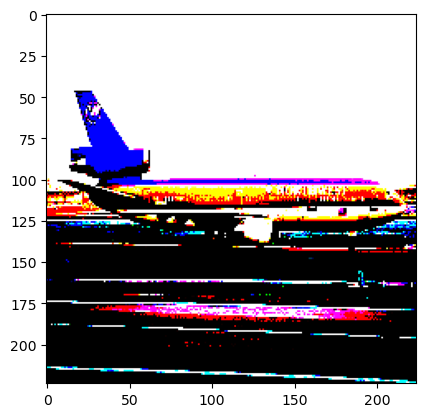

In [10]:
plt.imshow(input_image)
plt.show()

In [23]:
input_image[np.newaxis].shape

(1, 224, 224, 3)

In [24]:
decode_predictions(model.predict(input_image[None]),top=5)


[[('n02690373', 'airliner', 0.97733796),
  ('n04592741', 'wing', 0.021947427),
  ('n04552348', 'warplane', 0.00070305547),
  ('n04266014', 'space_shuttle', 7.876363e-06),
  ('n02687172', 'aircraft_carrier', 2.072229e-06)]]

### Let's see internal layers of the model using get_layer

In [11]:
feature_maps = tf.keras.Model(inputs = model.input, outputs=model.get_layer('block1_conv2').output)

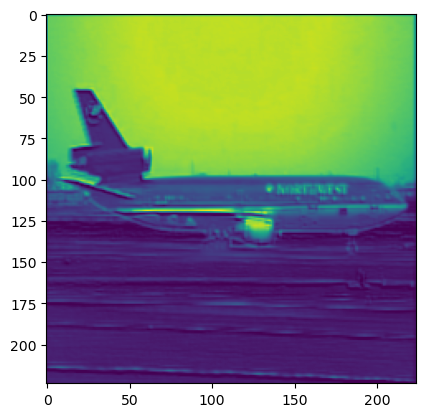

In [14]:
block1_conv2 = feature_maps.predict(input_image[None])
block1_conv2
plt.imshow(block1_conv2[0,...,4])
plt.show()

In [27]:
block1_conv2.shape    #same shape as the image but channels are 64

(1, 224, 224, 64)

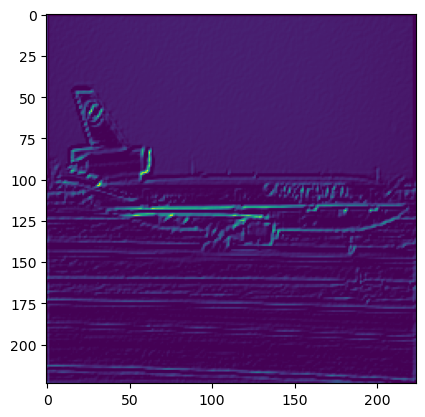

In [31]:
plt.imshow(block1_conv2[0,...,0])
plt.show()

In [33]:
feature_maps = tf.keras.Model(inputs = model.input, outputs=model.get_layer('block5_pool').output)
#this will change the size

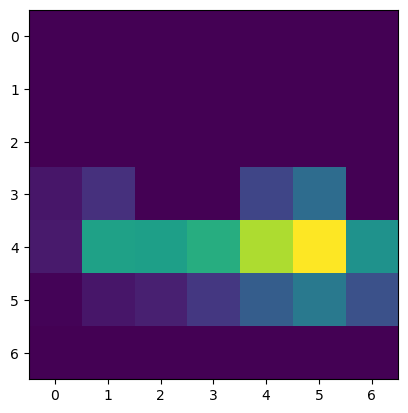

In [34]:
block5_pool = feature_maps.predict(input_image[None])

plt.imshow(block5_pool[0,...,4])
plt.show()

## Why do we need to resize images?
note that in this case it is the max pooling that reduces the image size, in some networks (rare) is the convolution that does that
if we don't resize we get an error message because the last layers throw that: the  convolutions layers could work nonetheless

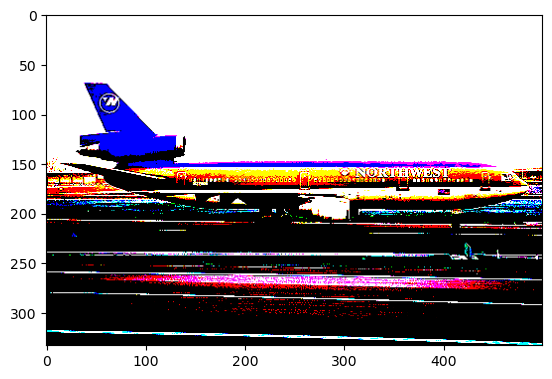

In [15]:
# trying not to resize
input_image = image_list[9]['image']
input_image = preprocess_input(input_image)
plt.imshow(input_image)
plt.show()

In [36]:
model.predict(input_image[None])

ValueError: in user code:

    File "/opt/conda/lib/python3.8/site-packages/keras/engine/training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "/opt/conda/lib/python3.8/site-packages/keras/engine/training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.8/site-packages/keras/engine/training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "/opt/conda/lib/python3.8/site-packages/keras/engine/training.py", line 1751, in predict_step
        return self(x, training=False)
    File "/opt/conda/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/conda/lib/python3.8/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "vgg16" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 333, 500, 3)


In [37]:
# recreate without the last layer, so that we do not have to resize the image
variable_size_model = VGG16(include_top=False,input_shape=(None,None,3))
#none means that it can be everything in terms of shape

In [38]:
?VGG16

Signature:
VGG16(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax',
)
Docstring:
Instantiates the VGG16 model.

Reference:
- [Very Deep Convolutional Networks for Large-Scale Image Recognition](
https://arxiv.org/abs/1409.1556) (ICLR 2015)

For image classification use cases, see
[this page for detailed examples](
  https://keras.io/api/applications/#usage-examples-for-image-classification-models).

For transfer learning use cases, make sure to read the
[guide to transfer learning & fine-tuning](
  https://keras.io/guides/transfer_learning/).

The default input size for this model is 224x224.

Note: each Keras Application expects a specific kind of input preprocessing.
For VGG16, call `tf.keras.applications.vgg16.preprocess_input` on your
inputs before passing them to the model.
`vgg16.preprocess_input` will convert the input images from RGB to BGR,
then will zero-center ea

In [39]:
variable_size_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [40]:
feature_maps = tf.keras.Model(inputs = variable_size_model.input, outputs=variable_size_model.get_layer('block1_conv2').output)


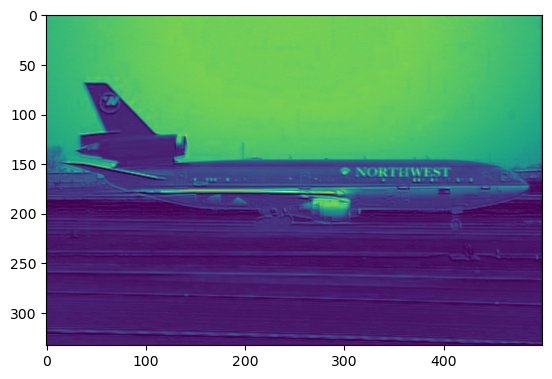

In [41]:
block1_conv2 = feature_maps.predict(input_image[None])

plt.imshow(block1_conv2[0,...,4])
plt.show()

In [42]:
print(block1_conv2.shape)
print(input_image[None].shape)

(1, 333, 500, 64)
(1, 333, 500, 3)


In [43]:
feature_maps = tf.keras.Model(inputs = variable_size_model.input, outputs=variable_size_model.get_layer('block5_pool').output)


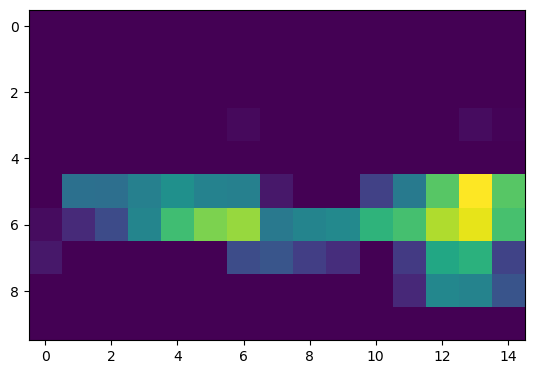

In [44]:
block5_pool = feature_maps.predict(input_image[None])

plt.imshow(block5_pool[0,...,4])
plt.show()

In [163]:
print(block5_pool.shape)


(1, 10, 15, 512)


# Object detection


Use the feature maps to predict objects in a region of the image

More difficult than classification and fewer off-the-shelf solutions but see https://keras.io/keras_cv/


![YOLO model.](images/yolo.png)


## Semantic segmentation


Pixel-wise classification

![YOLO model.](images/segmentation.png)


## A popular model is the UNET architecture

![UNET model.](images/unet.png)
